# Homework 3 (100 Points)

The goal of this homework is to get practice with classification.

## Exercise 1 (30 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Handle the missing values in the datasets. Briefly explain. **-5 points**

I found the number of missing values for each column using isnull().sum() and then replaced null ages with the average age, and the unknown Cabin and Embarked columns with 'Unknown'.

In [259]:
import pandas as pd
import numpy as np

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

#Find missing values
print(trainingSet.isnull().sum())

#Fill in missing ages with average
avg_age = trainingSet['Age'].mean()
trainingSet['Age'].fillna(avg_age, inplace=True)

#Fill in missing Cabin with Unknown
trainingSet['Cabin'].fillna('Unknown', inplace=True)

#Fill in missing embarked with U for Unknown
trainingSet['Embarked'].fillna('U', inplace=True)

#test
print(trainingSet.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


b) Add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. **-5 points**

The first feature I thought would be useful was the passenger's Title, as titles like 'Master' may be more likely to survive given their social status, or there might be a difference in survival rates between married and unmarried women (Miss vs. Mrs).

Another feature that could be useful is the deck letter of the cabin. Certain decks may have been affected more or earlier than others on survival rates. If the cabin is unknown the deck will be 'U'.

In [260]:
# Title feature Extraction
trainingSet['Title'] = trainingSet['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Deck Feature Extraction
trainingSet['Deck'] = trainingSet['Cabin'].apply(lambda x: x[0])

c) Split the dataset into training and testing. Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain with a plot presenting in x-axis the `max_depth` and in y-axis the accuracy (both training and testing). **- 10 points**

Removed 'PassengerID' because it is arbitrary.

Removed 'Name' because it was streamlined into 'title' feature. 

Removed 'Cabin' because it was streamlined into 'Deck' feature.

Edited 'Sex', 'Embarked', 'Deck' and 'Title' to be numerical.

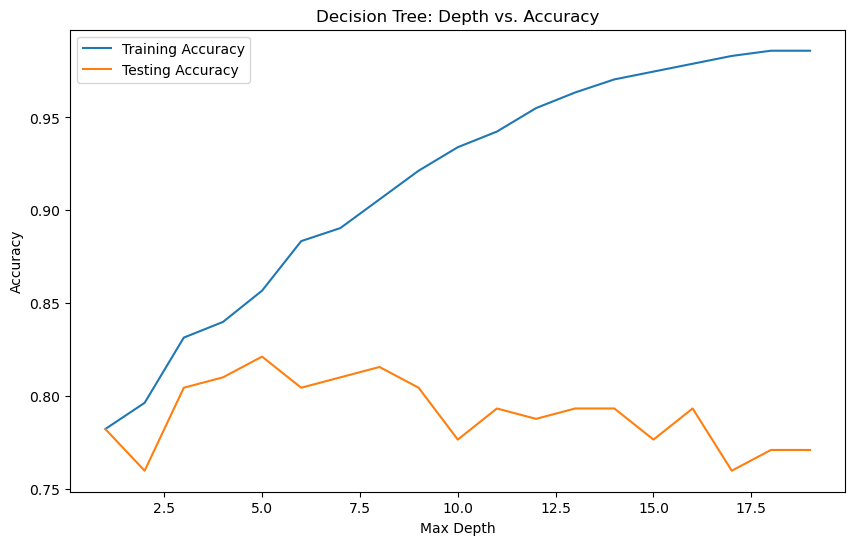

In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Drop Unnecessary Features
trainingSet.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#String to numerical
sex_map = {'male': 0, 'female': 1}
trainingSet['Sex'] = trainingSet['Sex'].map(sex_map)

deck_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'U': 7}
trainingSet['Deck'] = trainingSet['Deck'].map(deck_map)
trainingSet['Deck'] = trainingSet['Deck'].fillna(7)

embarked_map = {'S': 0, 'C': 1, 'Q': 2, 'U': 3}
trainingSet['Embarked'] = trainingSet['Embarked'].map(embarked_map)

title_map = {title: x for x, title in enumerate(trainingSet['Title'].unique())}
trainingSet['Title'] = trainingSet['Title'].map(title_map)




X = trainingSet.drop('Survived', axis=1)
y = trainingSet['Survived']


# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
train_accuracies = []
test_accuracies = []
depth_range = range(1, 20) 

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Training accuracy
    train_pred = model.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, train_pred))

    # Testing accuracy
    test_pred = model.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label='Training Accuracy')
plt.plot(depth_range, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Depth vs. Accuracy')
plt.legend()
plt.show()




d) Plot the decision tree. Briefly explains how it works. **- 5 points**

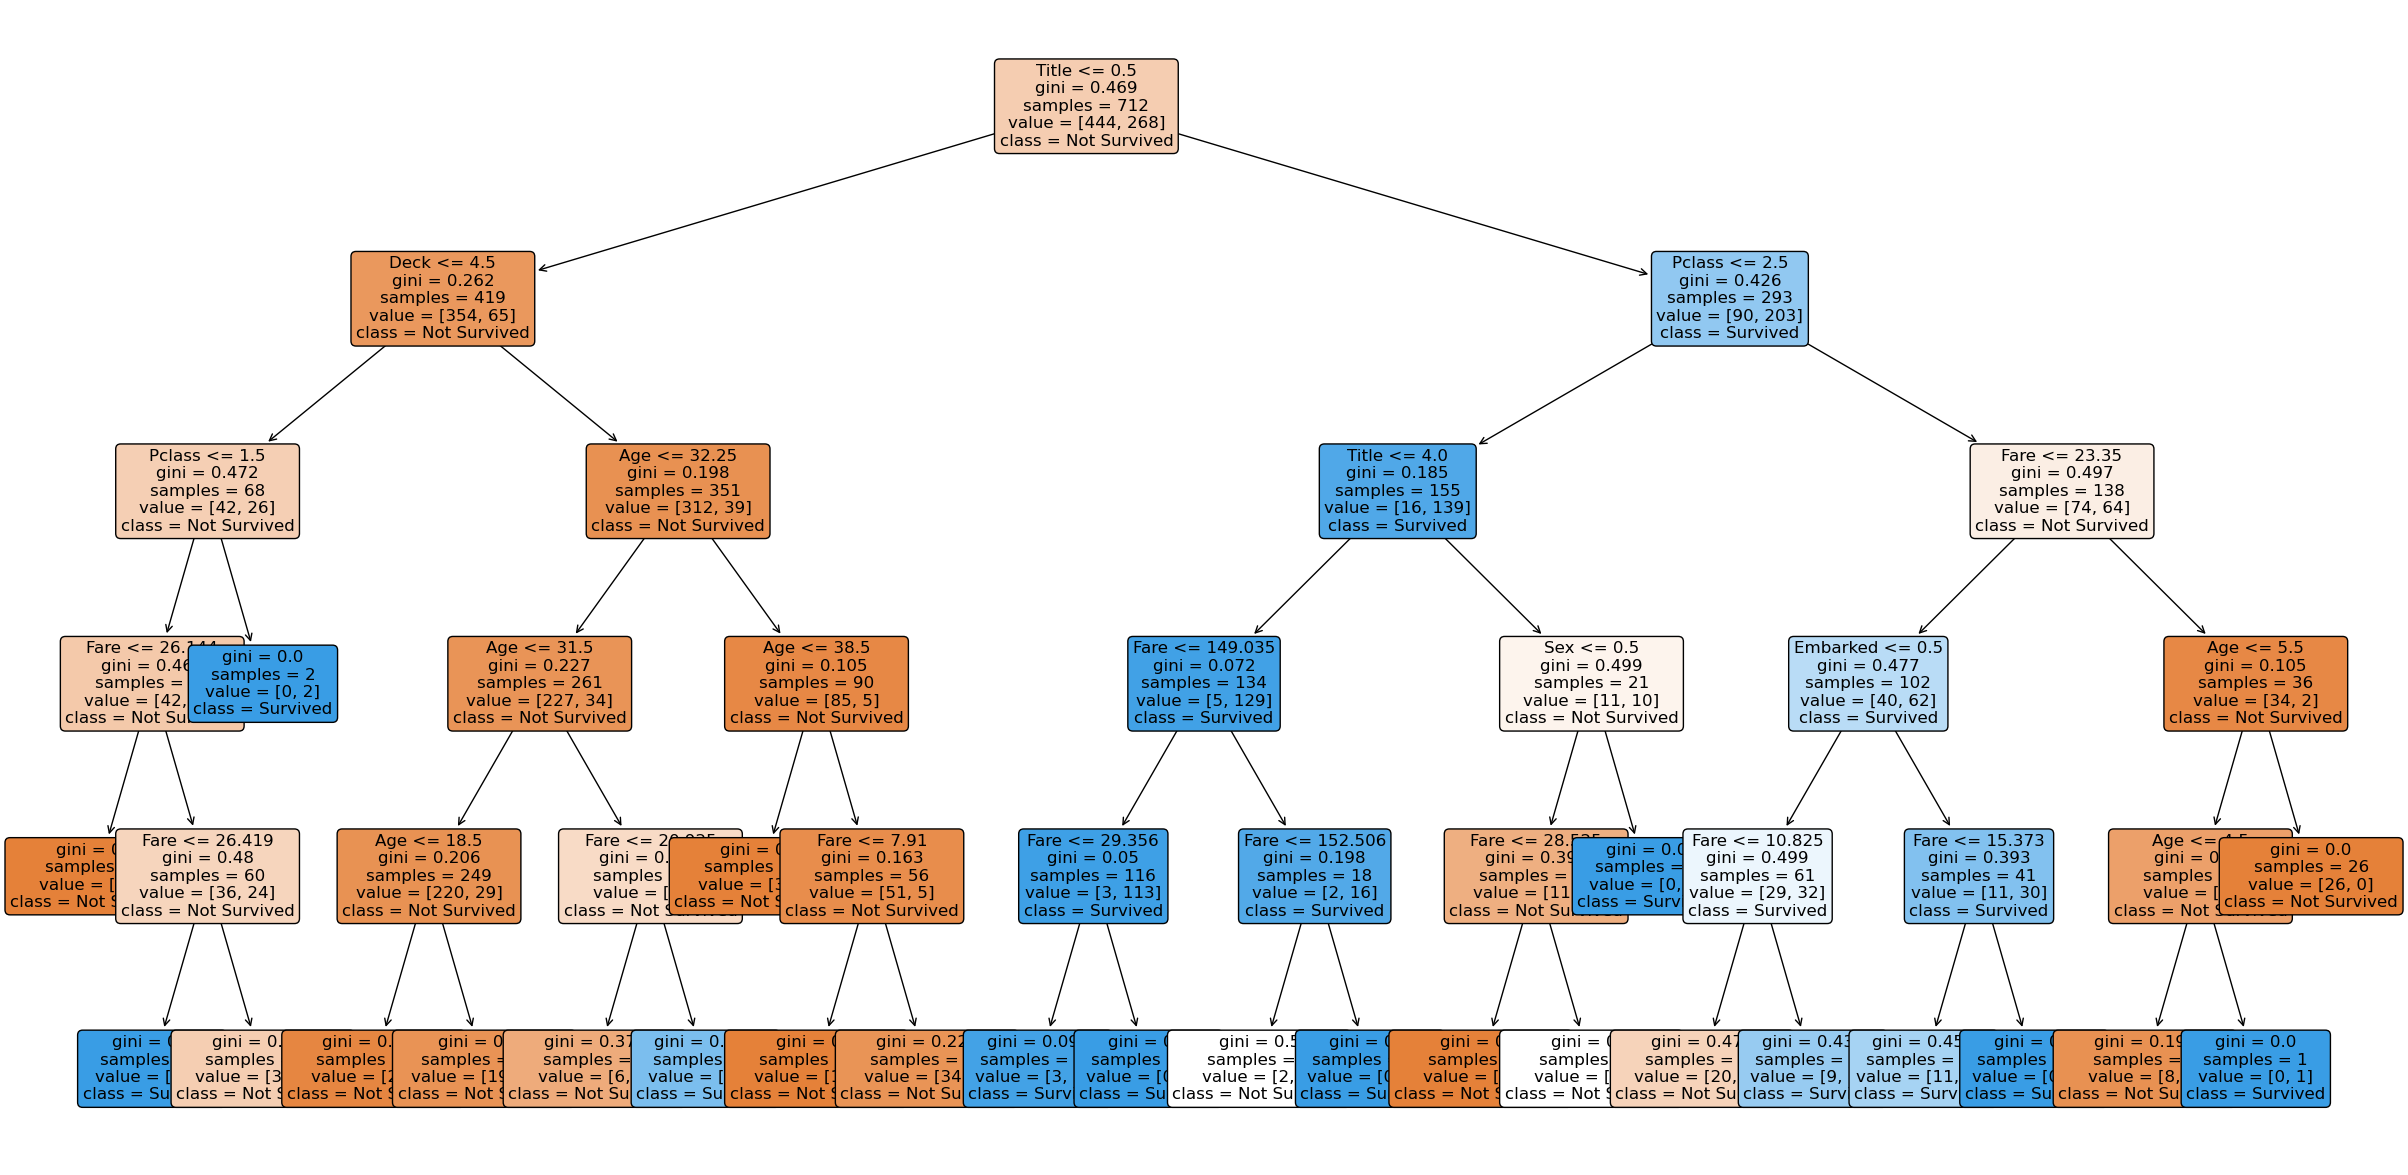

In [262]:
from sklearn.tree import plot_tree

#Set max-depth to 5 as it was shown to be the most accurate for testing
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(30,15))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True, fontsize=12)
plt.show()

The decision tree works by splitting the dataset into groups 'maxdepth' times. Each split is based on a certain attribute as higher or lower than a threshold. The leaf nodes are the final groups of rows which are classified as either 'surivived' or 'not survived'.

e) Plot the confusion matrix of the above classifier. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 5 points**

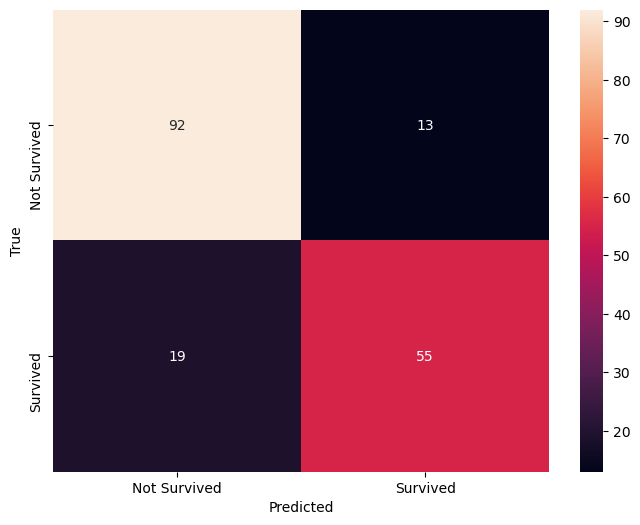

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title  Deck
621       1    0  42.0      1      0  52.5542         0      0   3.0
447       1    0  34.0      0      0  26.5500         0      0   7.0
192       3    1  19.0      1      0   7.8542         0      2   7.0
30        1    0  40.0      0      0  27.7208         1      4   7.0
673       2    0  31.0      0      0  13.0000         0      0   7.0


In [263]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Training accuracy
train_pred = model.predict(X_train)
train_accuracies.append(accuracy_score(y_train, train_pred))

# Testing accuracy
test_pred = model.predict(X_test)
test_accuracies.append(accuracy_score(y_test, test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



# pitfalls

misclassified_mask = test_pred != y_test
# Get the indices of misclassified examples
misclassified_indices = np.where(misclassified_mask)[0]
misclassified_examples = X_test[misclassified_mask]
print(misclassified_examples.head())

Misclassified Examples:

        Pclass  Sex   Age    SibSp  Parch   Fare       Embarked  Title   Deck
        621       1    0     42.0      1      0     52.5542       0         0     3.0

This row was incorrectly predicted as not survived.
It starts with a split from title < 1.5, then split from deck < 4.5, split from pclass < 1.5, and lastly split from fare < 26.544. Since the passenger had a low pclass, fare, title, and deck, the model most likely predicted they did not survive as 'low class' passengers were more likely to not survive.

        192       3    1  19.0      1      0   7.8542         0      2   7.0

This row was incorrectly predicted as not survived.
It starts with a split from title > 1.5, then split from pclass > 2.5, then split from fare < 23.35, then split from embarked < 0.5 and lastly fare < 10.825.
My guess is that the low fare informed the model to predict it as survived, as a fare above 10 with all other same attributes would have predicted it correctly.



# Exercise 2 (30pts)

Random Forest algorithm is an extension to the decision trees. We make use of multiple decision trees to make a decsion(classification/regression) in Random Forests.

Ensemble modelling is a method of constructing a strong model using several weak models. Random Forests algorithm is one such ensemble model

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k'(k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision. 

In this task, you are asked to construct a random forests algorithm on the 'Titanic' dataset making use of your decision trees from **1c** and get the classification outputs.

**Note**: Your cannot use the random forests model from sklearn or any other library, but you can use any library that implements an individual decision tree.

a) Construct a Random Forest Classifier using the template below. Use it on the training set you defined earlier with an arbitrary number of trees and tree depth and evaluate it on the test set you defined earlier. **-- 10pts**

In [264]:
# Used ChatGPT for help with this problem, mainly because 
# I had difficulty with the _majority() parameters missing self as well as 
# missing the _sample() method implementation

from sklearn.tree import DecisionTreeClassifier

class Random_Forest():

    def __init__(self, num_trees, max_depth):
        self.max_depth = max_depth
        self.decision_trees = [DecisionTreeClassifier(max_depth=self.max_depth) for _ in range(num_trees)]

    def _fit_tree(self, X, y, idx):
        self.decision_trees[idx].fit(X, y)
        
    # add sample method as fit method calls it
    def _sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace = True)
        return X.iloc[indices], y.iloc[indices]

    def fit(self, X, y):
        for idx in range(len(self.decision_trees)):
            X_sample, y_sample = self._sample(X, y)
            self._fit_tree(X_sample, y_sample, idx)
    
    #added self as a parameter cause it was missing?
    def _majority(self, predictions):
        majority_vote = np.apply_along_axis(lambda x: np.bincount(x, minlength=2).argmax(), axis = 1, arr = predictions)
        return majority_vote
    
    def predict(self, X_test, y_test):
        predictions = np.array([tree.predict(X_test) for tree in self.decision_trees]).T
        return self._majority(predictions)
    
# tree = 10; depth = 5 example
random_forest = Random_Forest(num_trees=10, max_depth=5)

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test, y_test)

#accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


b) Experiment with

 - different max depths = 5,10,15
 - different number of trees [10,50,100,500,1000]
 - different information criteria ['gini index', 'entropy'] 

Report the accuracy of your best and worst models, and compare them with the accuracy of the decision tree from **1c**. What observations did you make on Random Forests as a whole? **-- 15pts**

In [265]:
#test accuracy for all numtrees and depths

for d in [5, 10, 15]:
    for t in [10, 50, 100, 500, 1000]:
        random_forest = Random_Forest(num_trees=t, max_depth=d)

        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict(X_test, y_test)

        # accuracy
        accuracy = np.mean(y_pred == y_test)
        print("depth: " + str(d) + " trees: " + str(t))
        print(f'Accuracy: {accuracy:.2f}')

depth: 5 trees: 10
Accuracy: 0.84
depth: 5 trees: 50
Accuracy: 0.80
depth: 5 trees: 100
Accuracy: 0.82
depth: 5 trees: 500
Accuracy: 0.82
depth: 5 trees: 1000
Accuracy: 0.82
depth: 10 trees: 10
Accuracy: 0.81
depth: 10 trees: 50
Accuracy: 0.82
depth: 10 trees: 100
Accuracy: 0.81
depth: 10 trees: 500
Accuracy: 0.82
depth: 10 trees: 1000
Accuracy: 0.81
depth: 15 trees: 10
Accuracy: 0.81
depth: 15 trees: 50
Accuracy: 0.80
depth: 15 trees: 100
Accuracy: 0.80
depth: 15 trees: 500
Accuracy: 0.80
depth: 15 trees: 1000
Accuracy: 0.82


Best: depth: 5 trees: 10
        Accuracy: 0.84

Worst: depth: 15 trees: 500
        Accuracy: 0.80

RandomForests seems to have similar accuracy despite differing depths and trees. This may be user error however since I am a little confused on part (2a) and I used a little help from the internet for (2a).

c)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$C_{i} = \text{Count of elements belonging to class 'i'}$
$C = \text{Total Number of Elements}$

Consider we have a total of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column. **--5pts**

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below.

## Exercise 3 (40 Points)

For this question we will use Sonar dataset from sklearn.datasets, which contains sonar signals for classifying objects as either "rock" or "mine."

In [266]:
from sklearn.datasets import fetch_openml

sonar = fetch_openml(name="sonar", version=1)

X = sonar.data  # Features
y = sonar.target  # Target (rock or mine)

a) Begin by creating a training and testing datasest from the dataset, with a 80-20 ratio, and random_state=1. **1 pt**

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

b) Train a KNN classifier on the training set to classify sonar signals as either "Rock" or "Mine." Use cross-validation to find an appropriate value of K. Evaluate and print the model's performance on the testing set using accuracy. **-- 9 points**

In [268]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# initialize list of K values to test
k_values = list(range(1, 26))
best_k = 0
best_accuracy = 0

# cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    mean_accuracy = scores.mean()
    
    # Update best K and best accuracy
    if mean_accuracy > best_accuracy:
        best_k = k
        best_accuracy = mean_accuracy
        
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# accuracy
test_accuracy = best_knn.score(X_test, y_test)
print(f"Best K: {best_k}")
print(f"Accuracy on Testing Set: {test_accuracy:.2f}")

Best K: 1
Accuracy on Testing Set: 0.76


c) Using any combination of the classification tools we've discussed in class:

- KNN
- Naive Bayes
- SVM
- Decision Tree (including Random Forests)
- Ensemble Methods (AdaBoost, Bagging)

You may also use feature extraction tools like PCA. Train and tune a model on the training set and evaluate its performance on the test set using accuracy. **-- 30 points**

 * accuracy > .95 **-- 30 points**
 * accuracy between 0.94 and 0.95 **-- 25 points**
 * accuracy between 0.92 and 0.94 **-- 20 points**
 * accuracy between 0.9 and 0.92 **-- 15 points**
 * accuracy between 0.85 and 0.9 **-- 10 points**
 * accuracy between 0.8 and 0.85 **-- 7 points**
 * accuracy between 0.7 and 0.8 **-- 5 points**
 * accuracy < 0.7 **-- 3 points**

In [269]:

from sklearn.ensemble import AdaBoostClassifier

#Test AdaBoostClassifier with varying combinations of maxDepth and n_estimators
for d in [1,2,3,4,5]:
    for e in [5, 10, 25, 50, 100, 200, 300, 400, 500]:

        base_estimator = DecisionTreeClassifier(max_depth=d)  
        adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=e, random_state=1)

        adaboost.fit(X_train, y_train)

        y_pred = adaboost.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy:.2f} with depth = {d} and estimators = {e}')

#After testing the best combination is d = 2 and e = 300 with accuracy = 0.90




Accuracy: 0.67 with depth = 1 and estimators = 5
Accuracy: 0.74 with depth = 1 and estimators = 10
Accuracy: 0.76 with depth = 1 and estimators = 25
Accuracy: 0.86 with depth = 1 and estimators = 50
Accuracy: 0.79 with depth = 1 and estimators = 100
Accuracy: 0.76 with depth = 1 and estimators = 200
Accuracy: 0.76 with depth = 1 and estimators = 300
Accuracy: 0.76 with depth = 1 and estimators = 400
Accuracy: 0.76 with depth = 1 and estimators = 500
Accuracy: 0.81 with depth = 2 and estimators = 5
Accuracy: 0.67 with depth = 2 and estimators = 10
Accuracy: 0.71 with depth = 2 and estimators = 25
Accuracy: 0.76 with depth = 2 and estimators = 50
Accuracy: 0.88 with depth = 2 and estimators = 100
Accuracy: 0.86 with depth = 2 and estimators = 200
Accuracy: 0.90 with depth = 2 and estimators = 300
Accuracy: 0.88 with depth = 2 and estimators = 400
Accuracy: 0.88 with depth = 2 and estimators = 500
Accuracy: 0.81 with depth = 3 and estimators = 5
Accuracy: 0.88 with depth = 3 and estimator

Ended with accuracy = 0.9 using AdaBoostClassifier with maxDepth = 2 and estimators = 300.

# Bonus (15pts)

In this bonus we will implement 1-dimensional GMM clustering algorithm from scratch. A GMM distribution is composed of `k` components, each characterized by:

1. A mixture proportion
2. A mean for its Normal Distribution
3. A variance for its Normal Distribution

So, to generate a dataset that follows a GMM distrbution we need a list of those parameters. In this exercise we will use a class called `Component` to capture the parameters for a given component. And a GMM will be a list of `Component`s.

In [ ]:
class Component:
    def __init__(self, mixture_prop, mean, variance):
        self.mixture_prop = mixture_prop
        self.mean = mean
        self.variance = variance

example_gmm = [Component(.5, 5, 1), Component(.5, 8, 1)]


a) Complete the function below to validate and generate a dataset following a GMM distribution, given a specified set of GMM parameters as above and a size. You may only use the methods already imported in the cell. (10pts)

In [ ]:
from numpy.random import normal, uniform

def generate_gmm_dataset(gmm_params, size):
    if not is_valid_gmm(gmm_params):
        raise ValueError("GMM parameters are invalid")
    
    dataset = []
    for _ in range(size):
        comp = get_random_component(gmm_params)
        dataset += ...
    return dataset

def is_valid_gmm(gmm_params):
    '''
        Checks that the sum of the mixture
        proportions is 1
    '''
    return True

def get_random_component(gmm_params):
    '''
        returns component with prob
        proportional to mixture_prop
    '''
    ...
    return

# test your code: this should return a list of 10 numbers similar to worksheet 8
data = generate_gmm_dataset(example_gmm, 10)

b) Finish the implementation below of the Expectation-Maximization Algorithm. Only use methods that have been imported in the cell. Visualize the output of your code by plotting the original mixture distribution curves and the ones learned by the EM algorithm. (15pts)

In [ ]:
from scipy.stats import norm
from numpy import array, argmax
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def gmm_init(k, dataset):
    kmeans = KMeans(k, init='k-means++').fit(X=array(dataset).reshape(-1, 1))
    gmm_params = []
    ...
    return gmm_params


def compute_gmm(k, dataset, probs):
    '''
        Compute P(C_j), mean_j, var_j
    '''
    gmm_params = []
    ...
    return gmm_params


def compute_probs(k, dataset, gmm_params):
    '''
        For all x_i in dataset, compute P(C_j | X_i)
        = P(X_i | C_j)P(C_j) / P(X_i) for all C_j
        return the list of lists of all P(C_j | X_i)
        for all x_i in dataset.
    '''
    probs = []
    ...
    return probs


def expectation_maximization(k, dataset, iterations):
    '''
        Repeat for a set number of iterations.
    '''
    gmm_params = gmm_init(k, dataset)
    for _ in range(iterations):
        # expectation step
        probs = compute_probs(k, dataset, gmm_params)

        # maximization step
        gmm_params = compute_gmm(k, dataset, probs)

    return probs, gmm_params

Notes:

1. your code should work with any number of components, each with reasonable parameters.
2. your code should work for 1 to about 5 iterations of the EM algorithm. It may not work for iterations over 10 because the math we are doing may overflow and create `nans` - that's ok / don't worry about it.